# Data Preprocessing - 2 - Company Employed

In [1]:
import pandas as pd
import missingno as msn

In [2]:
df = pd.read_csv('./../../../datasets/consistent_ce_data.csv')

## Drop irrelevant and unuseful columns 

In [3]:
# Shape of dataframe
df.shape

(1308, 68)

It is better to drop columns which have more than half missing values. Columns such as these does not provide any relevant information and models can't learn from such columns.

In [4]:
# Drop irrelevant columns
for column in list(df.columns):
    if df[column].isnull().sum() > (df.shape[0]//2):
        df.drop(column, axis=1, inplace=True)

In [5]:
# Check final shape of dataframe
df.shape

(1308, 55)

## Missing values analysis

### Missing values identification

<AxesSubplot:>

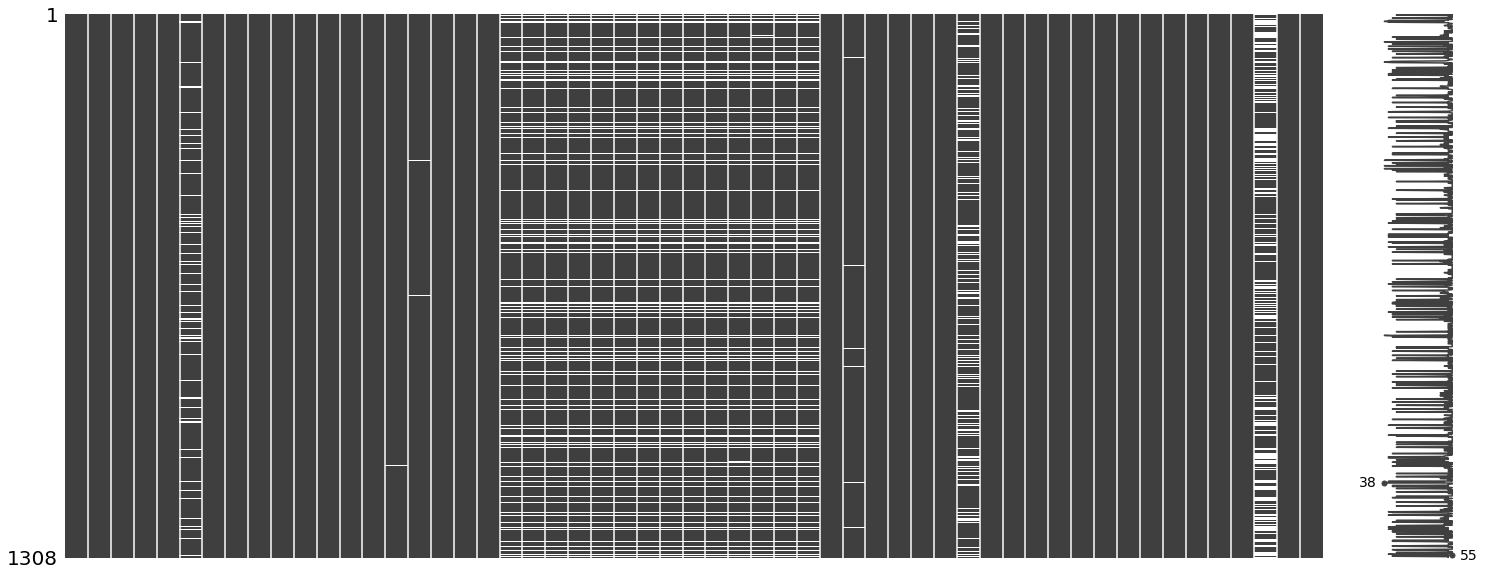

In [6]:
msn.matrix(df)

The above graoh is showing the positions of mising values in the dataframe. The missing values are nearly uniformly scatter and hence it would be better to treat them as per the information that the columns want to convey.

<AxesSubplot:>

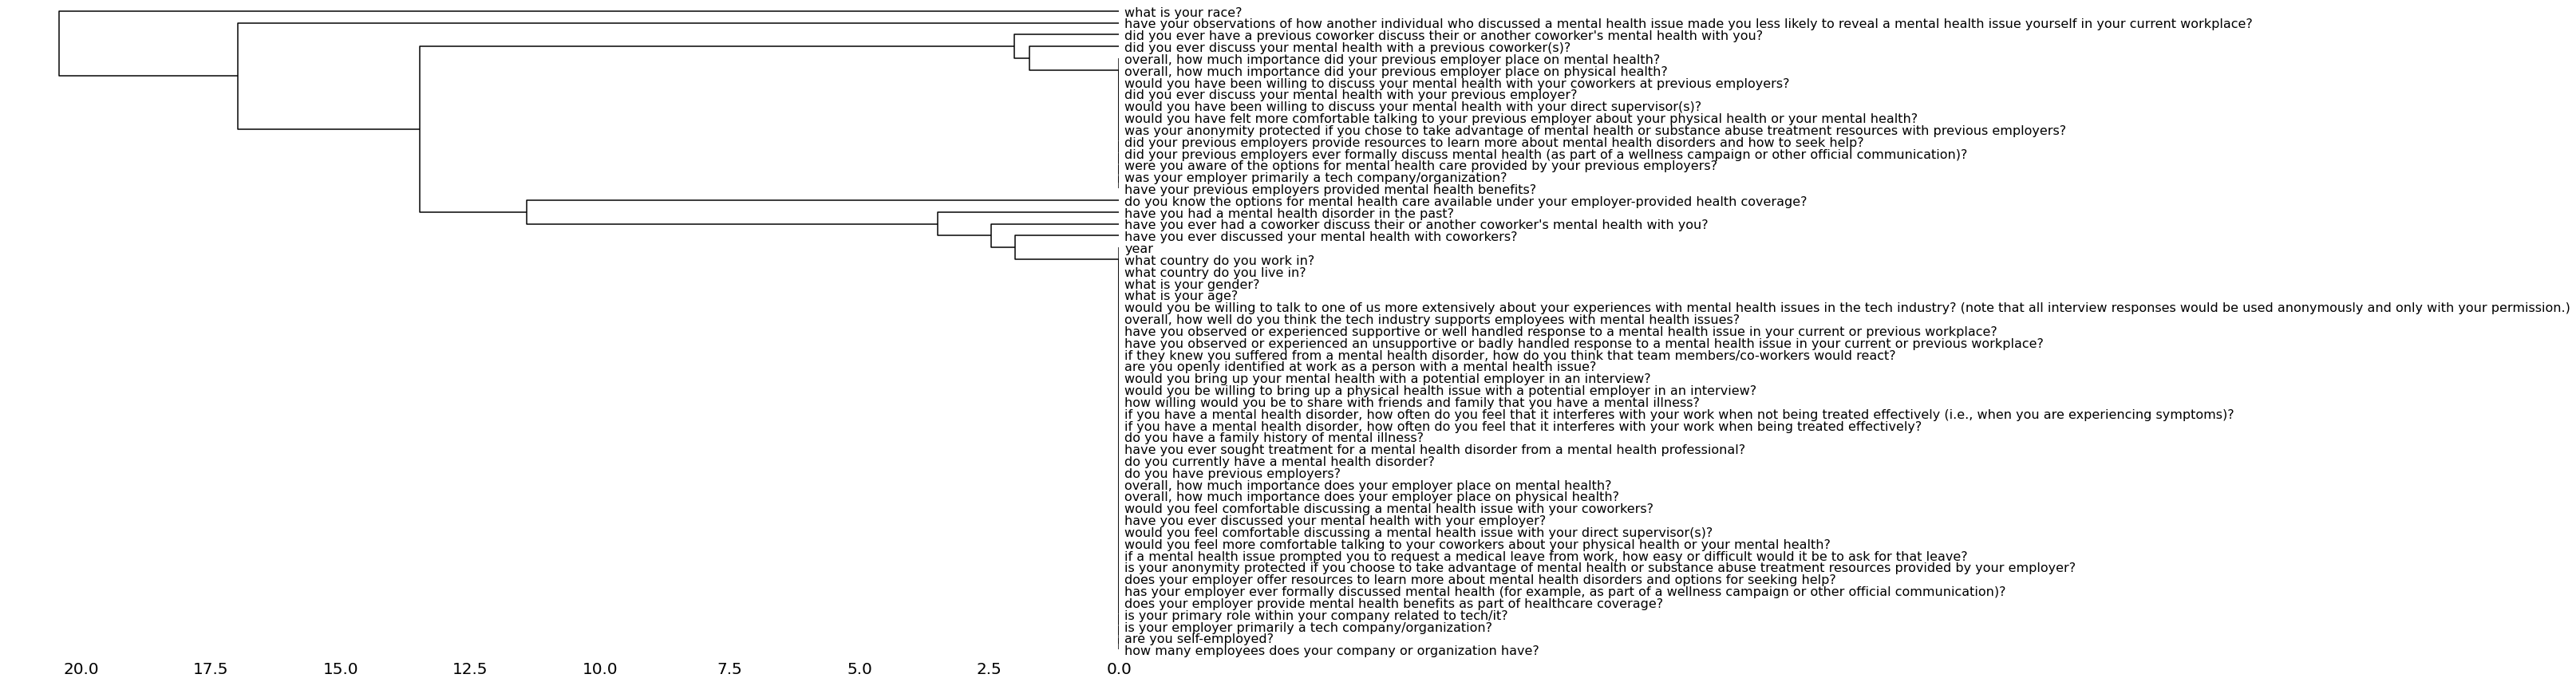

In [7]:
# Plot the dendrogram
msn.dendrogram(df)

# Double click on the chart to zoom in and zoom out.

Dendrogram is generated by hierarchical clustering algorithm to bin variables against each other based on their nullity correlation. The columns which are linked at a distance of zero can fully predict the presence of each other.  
AS per the graph, the features related to importance provided by the employers to the mental health and the features which express how the employees are treated with regards to mental health can fully predict each others presence. Similary, features related to demograhic information and other general information and features related to how person treats and feels about herself with regards to mental illness can also fully predict each others presence. There are two ways they can predict their presence one either one variable is always empty and other is always filled, or they might always be filled or both empty. In our case, it is more likely that that features which are linked at zero distance are always present. 

In [8]:
# Identifying columns with null values
df.columns[df.isna().any()].tolist()

['do you know the options for mental health care available under your employer-provided health coverage?',
 'have you ever discussed your mental health with coworkers?',
 "have you ever had a coworker discuss their or another coworker's mental health with you?",
 'was your employer primarily a tech company/organization?',
 'have your previous employers provided mental health benefits?',
 'were you aware of the options for mental health care provided by your previous employers?',
 'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
 'did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
 'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health

### Missing values imputation

For imputing missing values certain **assumptions** need to be made. Following are the assumptions - 
1. If a person does not provide any answer to a yes/no question, then it is assumed that she/he did not know the answer to the question and hence the missing value will be imputed with no.  
2. If a person does not provide an answer to the question which has an option - "I don't know" - then it will be assumed that she/he does not know the answer and the missing values will be imputed with "I don't know".
3. If a person does not provide an answer to the question which has an option - "N/A (was not aware)" - then it will be assumed that she/he is not aware of the context and hence the missing values will be imputed with "N/A (was not aware)".
4. If a person does not provide an answer to the question which was asking about certain resource availability, then it is assumed that the she/he is not aware of any mentioned resources and hence the missing values will be imputed with "None did".
5. If a person does not provide an answer to the question asking about comfortability of an expression of issue then the missing values will be imputed with "uncomfortable".
6. If a person does not provide asn answer to the question related to rating then the missing values will be imputed with 0.
7. For question regarding race, the missing values will be imputed with "I prefer not to answer" as it is one of the option and the most suitable for these cases.


In [9]:
# Fill missing values if required
df['do you know the options for mental health care available under your employer-provided health coverage?'].fillna('No', inplace=True)

df['have you ever discussed your mental health with coworkers?'].fillna(0.0, inplace=True)

df["have you ever had a coworker discuss their or another coworker's mental health with you?"].fillna(0.0, inplace=True)

df['was your employer primarily a tech company/organization?'].fillna(0.0, inplace=True)

df['have your previous employers provided mental health benefits?'].fillna("I don't know", inplace=True)

df['were you aware of the options for mental health care provided by your previous employers?'].fillna("N/A (was not aware)", inplace=True)

df['did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'].fillna("I don't know", inplace=True)

df['did your previous employers provide resources to learn more about mental health disorders and how to seek help?'].fillna("None did", inplace=True)

df['was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'].fillna("I don't know", inplace=True)

df['would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'].fillna("uncomfortable", inplace=True)

df['would you have been willing to discuss your mental health with your direct supervisor(s)?'].fillna("I don't know", inplace=True)

df['did you ever discuss your mental health with your previous employer?'].fillna(0.0, inplace=True)

df['would you have been willing to discuss your mental health with your coworkers at previous employers?'].fillna("No, at none of my previous employers", inplace=True)

df['did you ever discuss your mental health with a previous coworker(s)?'].fillna(0.0, inplace=True)

df["did you ever have a previous coworker discuss their or another coworker's mental health with you?"].fillna(0.0, inplace=True)

df['overall, how much importance did your previous employer place on physical health?'].fillna(0.0, inplace=True)

df['overall, how much importance did your previous employer place on mental health?'].fillna(0.0, inplace=True)

df['have you had a mental health disorder in the past?'].fillna("Don't Know", inplace=True)

df['have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?'].fillna('Maybe', inplace=True)

df['what is your race?'].fillna("I prefer not to answer", inplace=True)

## Filtering data

After close examination of data, it can be observed that the subjects have unequal participation with regards to the country they live in, country they work in and race to which they belong to.  
For current analysis, I would like to drop to subjects from countries and races with lesser participation so that machine learning model that will be used can learn with the help of the information provided by the data.

In [10]:
# Filter data with regards to country people work in 
df = df.groupby('what country do you work in?').filter(lambda x: len(x)>5)

# Filter data with regards to country people live in 
df = df.groupby('what country do you live in?').filter(lambda x: len(x)>5)

# Filter data with regards to race
df = df.groupby('what is your race?').filter(lambda x: len(x)>5)

In [11]:
# Write file to csv
df.to_csv('./../../../datasets/preprocessed_ce.csv', index=False)